<a href="https://colab.research.google.com/github/nilamaula26/Praktikum-Kuliah/blob/main/Linear_Regression_Stress_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             mean_squared_log_error,
                             r2_score)

dataset= pd.read_csv("/content/Sleep_health_and_lifestyle_dataset (1).csv")
dataset.head(6)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


In [2]:
print("Jumlah dataset saya: "+str(len(dataset.index)))

Jumlah dataset saya: 374


In [3]:
# Splitting the blood pressure values into systolic and diastolic values
dataset[['Systolic_BP', 'Diastolic_BP']] = dataset['Blood Pressure'].str.split('/', expand=True)

# Converting the systolic and diastolic values to numeric data type
dataset['Systolic_BP'] = dataset['Systolic_BP'].astype(int)
dataset['Diastolic_BP'] = dataset['Diastolic_BP'].astype(int)

# Drop the "Blood Pressure" column from the dataset
dataset = dataset.drop("Blood Pressure", axis=1)

# Print the updated dataset with readable blood pressure values without the "Blood Pressure" column
print(dataset)


     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [4]:
# Drop the "Person ID" column from the dataset
dataset = dataset.drop("Person ID", axis=1)

# Print the updated dataset without the "Person ID" column
print(dataset)


     Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0      Male   27     Software Engineer             6.1                 6   
1      Male   28                Doctor             6.2                 6   
2      Male   28                Doctor             6.2                 6   
3      Male   28  Sales Representative             5.9                 4   
4      Male   28  Sales Representative             5.9                 4   
..      ...  ...                   ...             ...               ...   
369  Female   59                 Nurse             8.1                 9   
370  Female   59                 Nurse             8.0                 9   
371  Female   59                 Nurse             8.1                 9   
372  Female   59                 Nurse             8.1                 9   
373  Female   59                 Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0               

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  Systolic_BP              374 non-null    int64  
 12  Diastolic_BP             374 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB


In [6]:
# Create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Reshape the "Occupation", "Gender", "BMI Category", and "Sleep Disorder" data
# to match the expected input shape of OrdinalEncoder
encoded_data = ordinal_encoder.fit_transform(dataset[['Occupation',
                                                      'Gender',
                                                      'BMI Category',
                                                      'Sleep Disorder']])

# Convert the encoded data array to integers
encoded_data = encoded_data.astype(int)

# Create mapping dictionaries for encoded values to category labels
occupation_dict = {encoded_value: category_label
                   for encoded_value, category_label
                   in zip(encoded_data[:, 0], dataset['Occupation'])}
gender_dict = {encoded_value: category_label
               for encoded_value, category_label
               in zip(encoded_data[:, 1], dataset['Gender'])}
bmi_category_dict = {encoded_value: category_label
                     for encoded_value, category_label
                     in zip(encoded_data[:, 2], dataset['BMI Category'])}
sleep_disorder_dict = {encoded_value: category_label
                       for encoded_value, category_label
                       in zip(encoded_data[:, 3], dataset['Sleep Disorder'])}


# Update the "Occupation" and "Gender" columns with the encoded values
dataset[['Occupation', 'Gender',
         'BMI Category', 'Sleep Disorder']] = encoded_data


In [7]:
# Print the encoded occupation and gender values, and the respective dictionaries
print(occupation_dict)
print(gender_dict)
print(bmi_category_dict)
print(sleep_disorder_dict)

{9: 'Software Engineer', 1: 'Doctor', 6: 'Sales Representative', 10: 'Teacher', 5: 'Nurse', 2: 'Engineer', 0: 'Accountant', 8: 'Scientist', 3: 'Lawyer', 7: 'Salesperson', 4: 'Manager'}
{1: 'Male', 0: 'Female'}
{3: 'Overweight', 0: 'Normal', 2: 'Obese', 1: 'Normal Weight'}
{1: 'None', 2: 'Sleep Apnea', 0: 'Insomnia'}


In [8]:
print(dataset.head(5))

   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           6             5.9                 4   
4       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                       42             6             3          77   
1                       60             8             0          75   
2                       60             8             0          75   
3                       30             8             2          85   
4                       30             8             2          85   

   Daily Steps  Sleep Disorder  Systolic_BP  Diastolic_BP  
0         4200               1          126            83  
1        10000               1          125            80  
2        10000

In [9]:
dataset.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,3.772727,7.132086,7.312834,59.171123,5.385027,1.296791,70.165775,6816.844920,1.002674,128.553476,84.649733
std,0.500641,8.673133,3.056081,0.795657,1.196956,20.830804,1.774526,1.431226,4.135676,1617.915679,0.644626,7.748118,6.161611
min,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,115.000000,75.000000
25%,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,1.000000,125.000000,80.000000
50%,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,1.000000,130.000000,85.000000
75%,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,3.000000,72.000000,8000.000000,1.000000,135.000000,90.000000
max,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,2.000000,142.000000,95.000000


Penentuan variabel dan pembagian data

In [10]:
x = dataset.drop(columns=['Stress Level'])
y = dataset['Stress Level']

In [11]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [12]:
regressor = LinearRegression()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [14]:
regressor.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(x_test)

In [16]:
print(regressor.intercept_)

8.280848916137348


In [17]:
print(regressor.coef_)

[ 0.86125561  2.56383433 -0.87998031 -1.37903507 -6.13390718 -0.32395326
 -0.68062093  1.15745083  1.36216862  0.27882111 -1.24811671  0.87372469]


In [18]:
dataframe = pd.DataFrame({'Data Sebenarnya': y_test, 'Data Prediksi': y_pred})
dataframe.head(5)

,Data Sebenarnya,Data Prediksi
122,4,4.381032
295,8,8.033545
311,7,6.146356
210,5,5.177950
204,4,4.437026


In [19]:
#sns.pairplot(dataset)

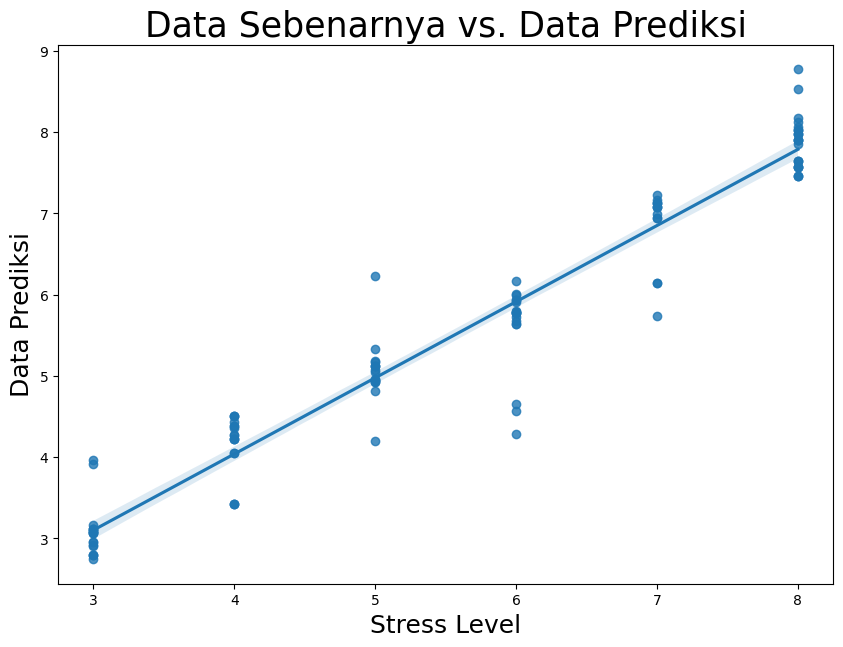

In [20]:
plt.figure(figsize=(10,7))
plt.title("Data Sebenarnya vs. Data Prediksi",fontsize=25)
plt.xlabel("Data sebenarnya",fontsize=18)
plt.ylabel("Data Prediksi", fontsize=18)
sns.regplot(x=y_test, y=y_pred)
plt.show()

In [21]:
feature_cols = ['Gender','Age','Occupation','BMI Category','Sleep Duration',
                'Quality of Sleep','Physical Activity Level','Heart Rate',
                'Daily Steps','Systolic_BP','Diastolic_BP', 'Sleep Disorder']
X = dataset[feature_cols]
y = dataset['Stress Level']
list(zip(feature_cols, regressor.coef_))


[('Gender', 0.8612556098606917),
 ('Age', 2.563834332848864),
 ('Occupation', -0.8799803058316584),
 ('BMI Category', -1.3790350719444464),
 ('Sleep Duration', -6.133907182016081),
 ('Quality of Sleep', -0.32395326085366716),
 ('Physical Activity Level', -0.680620931006526),
 ('Heart Rate', 1.1574508319794188),
 ('Daily Steps', 1.362168623020036),
 ('Systolic_BP', 0.27882111448127456),
 ('Diastolic_BP', -1.2481167149395658),
 ('Sleep Disorder', 0.8737246878479232)]

In [22]:
print("Coefficient of determination :",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Coefficient of determination : 0.942668901209751
MSE:  0.18522493143495428
RMSE:  0.4303776614032776


In [23]:
dataset.corr()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
Gender,1.000000,-0.596358,-0.219113,-0.121579,-0.291366,0.001454,0.396018,-0.352060,0.217105,-0.014509,-0.253415,-0.210527,-0.268378
Age,-0.596358,1.000000,0.231188,0.344709,0.473734,0.178993,-0.422344,0.511329,-0.225606,0.057973,0.232000,0.605878,0.593839
Occupation,-0.219113,0.231188,1.000000,-0.325775,-0.278071,-0.103660,0.021123,0.699504,0.043928,-0.105877,-0.169800,0.518561,0.521835
Sleep Duration,-0.121579,0.344709,-0.325775,1.000000,0.883213,0.212360,-0.811023,-0.376358,-0.516455,-0.039533,0.177552,-0.180406,-0.166570
Quality of Sleep,-0.291366,0.473734,-0.278071,0.883213,1.000000,0.192896,-0.898752,-0.312562,-0.659865,0.016791,0.179592,-0.121632,-0.110151
Physical Activity Level,0.001454,0.178993,-0.103660,0.212360,0.192896,1.000000,-0.034134,0.077156,0.136971,0.772723,0.433214,0.265416,0.382651
Stress Level,0.396018,-0.422344,0.021123,-0.811023,-0.898752,-0.034134,1.000000,0.163895,0.670026,0.186829,-0.036058,0.102818,0.091811
BMI Category,-0.352060,0.511329,0.699504,-0.376358,-0.312562,0.077156,0.163895,1.000000,0.295585,-0.005059,0.016573,0.714057,0.750869
Heart Rate,0.217105,-0.225606,0.043928,-0.516455,-0.659865,0.136971,0.670026,0.295585,1.000000,-0.030309,0.205987,0.294143,0.271092
Daily Steps,-0.014509,0.057973,-0.105877,-0.039533,0.016791,0.772723,0.186829,-0.005059,-0.030309,1.000000,0.342098,0.103342,0.241986
